# Analyzing data from the Star Wars movies

In this project, I am going to use data from surveys of Star Wars fans, to see which Star Wars movie they viewed and enjoyed the most, and which Star Wars characters were the most popular. The data was collected by [FiveThirtyEight](http://fivethirtyeight.com/) and is available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Setup

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can see that in many of the columns, the values are Yes/No but we would rather store those values as True/False.

In addition, we can see that for the question about which films each viewer has seen, and each viewer's ratings of the films, there are many columns but we'd like to clean and consolidate the information.

In the next steps, I will clean and handle these columns.

## Convert Yes/No values to True/False

In [147]:
# convert the 2nd and 3rd columns values of Yes/No to True/False
yes_no_dict = {
    'Yes': True,
    'No': False
}

cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?']

for c in cols:
    star_wars[c] = star_wars[c].map(yes_no_dict)

In [148]:
cols = star_wars.columns[3:9]
for c in cols:
    print(star_wars[c].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64


In [149]:
# clean the columns that concern which films a viewer has seen
# if the value in the cell is the name of a movie, then the viewer saw the movie
# if the value in the cell is NaN, then the viewer did not see the movie
movie_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

cols = star_wars.columns[3:9]

for c in cols:
    star_wars[c] = star_wars[c].map(movie_dict)
    
print(star_wars.head(10))

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              
5    3292719380                                               True              
6    3292684787                                               True              
7    3292663732                                               True              
8    3292654043                                               True              
9    3292640424                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                

In [150]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [151]:
# rename the columns to be more descriptive
star_wars = star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
})
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Convert rating columns to numeric

In [152]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

In [153]:
# convert values in rating columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename the columns to be more descriptive
star_wars = star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Episode I: The Phantom Menace',
    'Unnamed: 10': 'Episode II: Attack of the Clones',
    'Unnamed: 11': 'Episode III: Revenge of the Sith',
    'Unnamed: 12': 'Episode IV: A New Hope',
    'Unnamed: 13': 'Episode V: The Empire Strikes Back',
    'Unnamed: 14': 'Episode VI: Return of the Jedi',
})
star_wars[star_wars.columns[9:15]].head(5)

,Episode I: The Phantom Menace,Episode II: Attack of the Clones,Episode III: Revenge of the Sith,Episode IV: A New Hope,Episode V: The Empire Strikes Back,Episode VI: Return of the Jedi
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Find the highest-rated Star Wars movie

Now that the relevant columns are cleaned, I will find the highest-rated movie in the Star Wars franchies by taking the average of each movie's ratings and visualizing the results. We keep in mind that a lower rating is better!

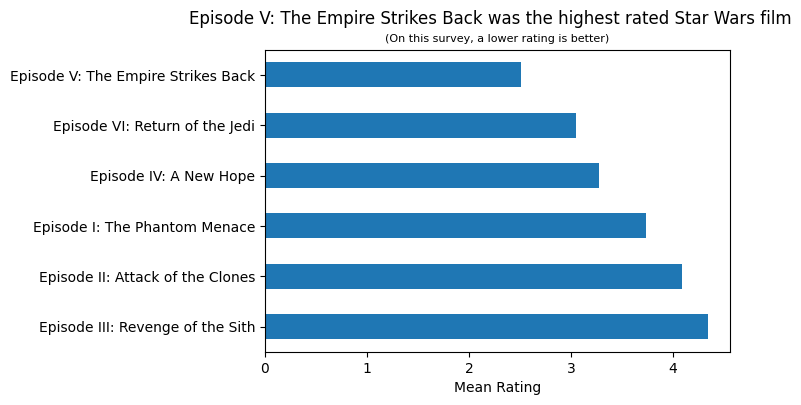

In [154]:
star_wars.mean()[9:15].sort_values(ascending=False).plot(kind = 'barh')
plt.xlabel('Mean Rating')
plt.suptitle('Episode V: The Empire Strikes Back was the highest rated Star Wars film')
plt.title('(On this survey, a lower rating is better)', size=8)
plt.show()

The data indicate that "Episode V: The Empire Strikes Back" was the highest rated Star Wars film of the bunch. When FiveThirtyEight collected this data, they wanted to see if the highest-rated movie was Episode V as they anticipated. The results indicate that this was the case!

## Identifying the Star Wars film that the most respondents have seen

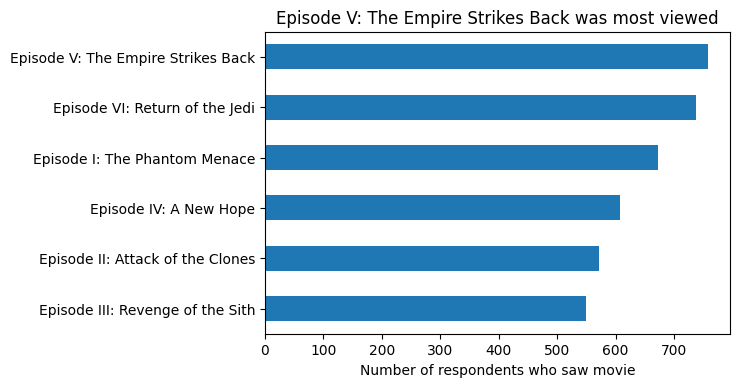

In [155]:
subset_seen = star_wars[star_wars.columns[3:9]]
subset_seen = subset_seen.rename(columns = {
    'seen_1': 'Episode I: The Phantom Menace',
    'seen_2': 'Episode II: Attack of the Clones',
    'seen_3': 'Episode III: Revenge of the Sith',
    'seen_4': 'Episode IV: A New Hope',
    'seen_5': 'Episode V: The Empire Strikes Back',
    'seen_6': 'Episode VI: Return of the Jedi'
})
subset_seen.sum().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of respondents who saw movie')
plt.title('Episode V: The Empire Strikes Back was most viewed')
plt.show()

We can see that Episode V: The Empire Strikes Back was not only the highest-rated film, but also the most commonly viewed film among respondents.

## Examining the highest-rated and most-watched films by gender

In [156]:
star_wars.columns[[3,4]]

Index(['seen_1', 'seen_2'], dtype='object')

In [157]:
# split data based on gender
star_wars_f = star_wars[star_wars['Gender'] == 'Female']
star_wars_m = star_wars[star_wars['Gender'] == 'Male']

subset_seen = star_wars[star_wars.columns[[3,4,5,6,7,8,33]]]
subset_seen = subset_seen.rename(columns = {
    'seen_1': 'Episode I: The Phantom Menace',
    'seen_2': 'Episode II: Attack of the Clones',
    'seen_3': 'Episode III: Revenge of the Sith',
    'seen_4': 'Episode IV: A New Hope',
    'seen_5': 'Episode V: The Empire Strikes Back',
    'seen_6': 'Episode VI: Return of the Jedi',
    'Gender': 'Gender'
})
subset_seen_f = subset_seen[subset_seen['Gender'] == 'Female'].drop(labels='Gender', axis=1)
subset_seen_m = subset_seen[subset_seen['Gender'] == 'Male'].drop(labels='Gender', axis=1)

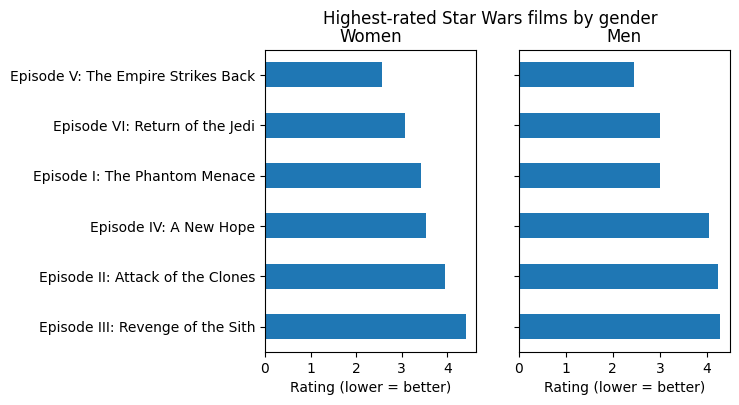

In [158]:
# create barplots showing highest rated films by gender
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Highest-rated Star Wars films by gender')
star_wars_f.mean()[9:15].sort_values(ascending=False).plot(kind = 'barh',
                                                          ax = ax1)
ax1.set_title('Women')
ax1.set_xlabel('Rating (lower = better)')
star_wars_m.mean()[9:15].sort_values(ascending=False).plot(kind = 'barh',
                                                          ax = ax2)
ax2.set_title('Men')
ax2.set_xlabel('Rating (lower = better)')
ax2.set_yticklabels([])
plt.show()

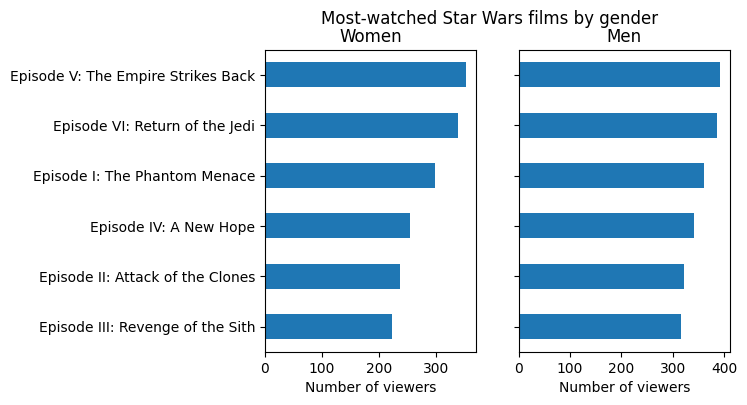

In [159]:
# create barplots showing most watched films by gender
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Most-watched Star Wars films by gender')
subset_seen_f.sum().sort_values(ascending=True).plot(kind = 'barh',
                                                          ax = ax1)
ax1.set_title('Women')
ax1.set_xlabel('Number of viewers')
subset_seen_m.sum().sort_values(ascending=True).plot(kind = 'barh',
                                                          ax = ax2)
ax2.set_title('Men')
ax2.set_yticklabels([])
ax2.set_xlabel('Number of viewers')
plt.show()

We can see that there were no major gender differences in the highest-rated or most-watched Star Wars films. The second set of plots suggests that men viewed Episode VI: Return of the Jedi, more often than did women. In addition, the first set of plots indicates that women rated Episode V: Return of the Jedi higher on average than did men.

## Examining the most popular Star Wars character

Finally, I'll examine which characters in the franchise are most popular. I'll clean relevant columns and then visualize mean ratings for each character.

In [160]:
star_wars[star_wars.columns[15:29]].head(5)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [161]:
# rename the character columns
star_wars = star_wars.rename(columns = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2-D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala', 
    'Unnamed: 28': 'Yoda'
})

In [162]:
# function to relabel character ratings
rating_dict = {
    'Very favorably': 5,
    'Somewhat favorably': 4,
    'Neither favorably nor unfavorably (neutral)': 3,
    'Somewhat unfavorably': 2,
    'Very unfavorably': 1
}

# convert character ratings columns to numeric
cols = star_wars.columns[15:29]
for c in cols:
    star_wars[c] = star_wars[c].map(rating_dict)

In [163]:
# check out the renamed columns
star_wars[star_wars.columns[15:29]].head(5)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
4,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


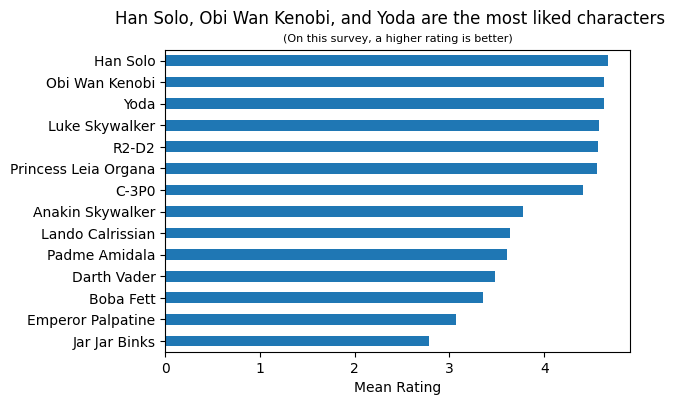

In [164]:
star_wars.mean()[15:29].sort_values(ascending=True).plot(kind = 'barh')
plt.xlabel('Mean Rating')
plt.suptitle('Han Solo, Obi Wan Kenobi, and Yoda are the most liked characters')
plt.title('(On this survey, a higher rating is better)', size=8)
plt.show()

We can see that Han Solo, Obi Wan Kenobi, and Yoda are the most liked characters, whereas Emperor Palpatine and Jar Jar Binks are the most disliked characters.